In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("data.csv")
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
X = df["sqft_living"]
Y = df["price"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape)

(3220,)


In [6]:
def hypothesis(x, t0, t1):
    return t0 + np.dot(x, t1)

In [7]:
def cost_function(x, y, t0, t1):
    m = len(x)
    y_hat = hypothesis(x, t0, t1)
    return (np.sum(np.dot((y_hat - y), (y_hat - y).T))) / 2 * m

In [8]:
def gradient_descent(x, y, t0, t1, iters, alpha):
    m = len(x)
    for i in range(iters):
        y_hat = hypothesis(x, t0, t1)
        dt0 = (np.sum(y_hat - y)) / m
        dt1 = (np.sum(np.dot((y_hat - y), x))) / m
        t0 = t0 - alpha * dt0
        t1 = t1 - alpha * dt1
    
    return t0, t1

In [9]:
theta0 = theta1 = 0.0
theta0, theta1 = gradient_descent(x_train, y_train, theta0, theta1, 2000, 0.0000001)
print(theta0)
print(theta1)

0.11707569101001813
257.28697295917146


In [10]:
y_pred = hypothesis(x_test, theta0, theta1)
y_pred

array([712685.0321726 , 650936.15866239, 541589.19515475, ...,
       558312.84839709, 509428.32353485, 838755.64892259])

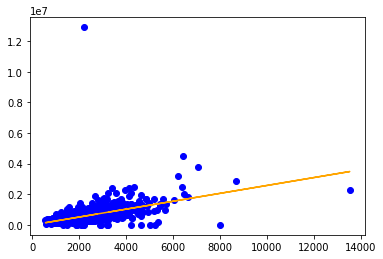

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( x_test, y_test, color = 'blue' )  
plt.plot( x_test, y_pred, color = 'orange' )
plt.show()